Step 1: Import Libraries and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['target_names'])

['malignant' 'benign']


In [6]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
cancer['data'].shape

(569, 30)

In [8]:
df_cancer = pd.DataFrame(
    np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target'])
)

In [9]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


Step 2: Visualizing the Data


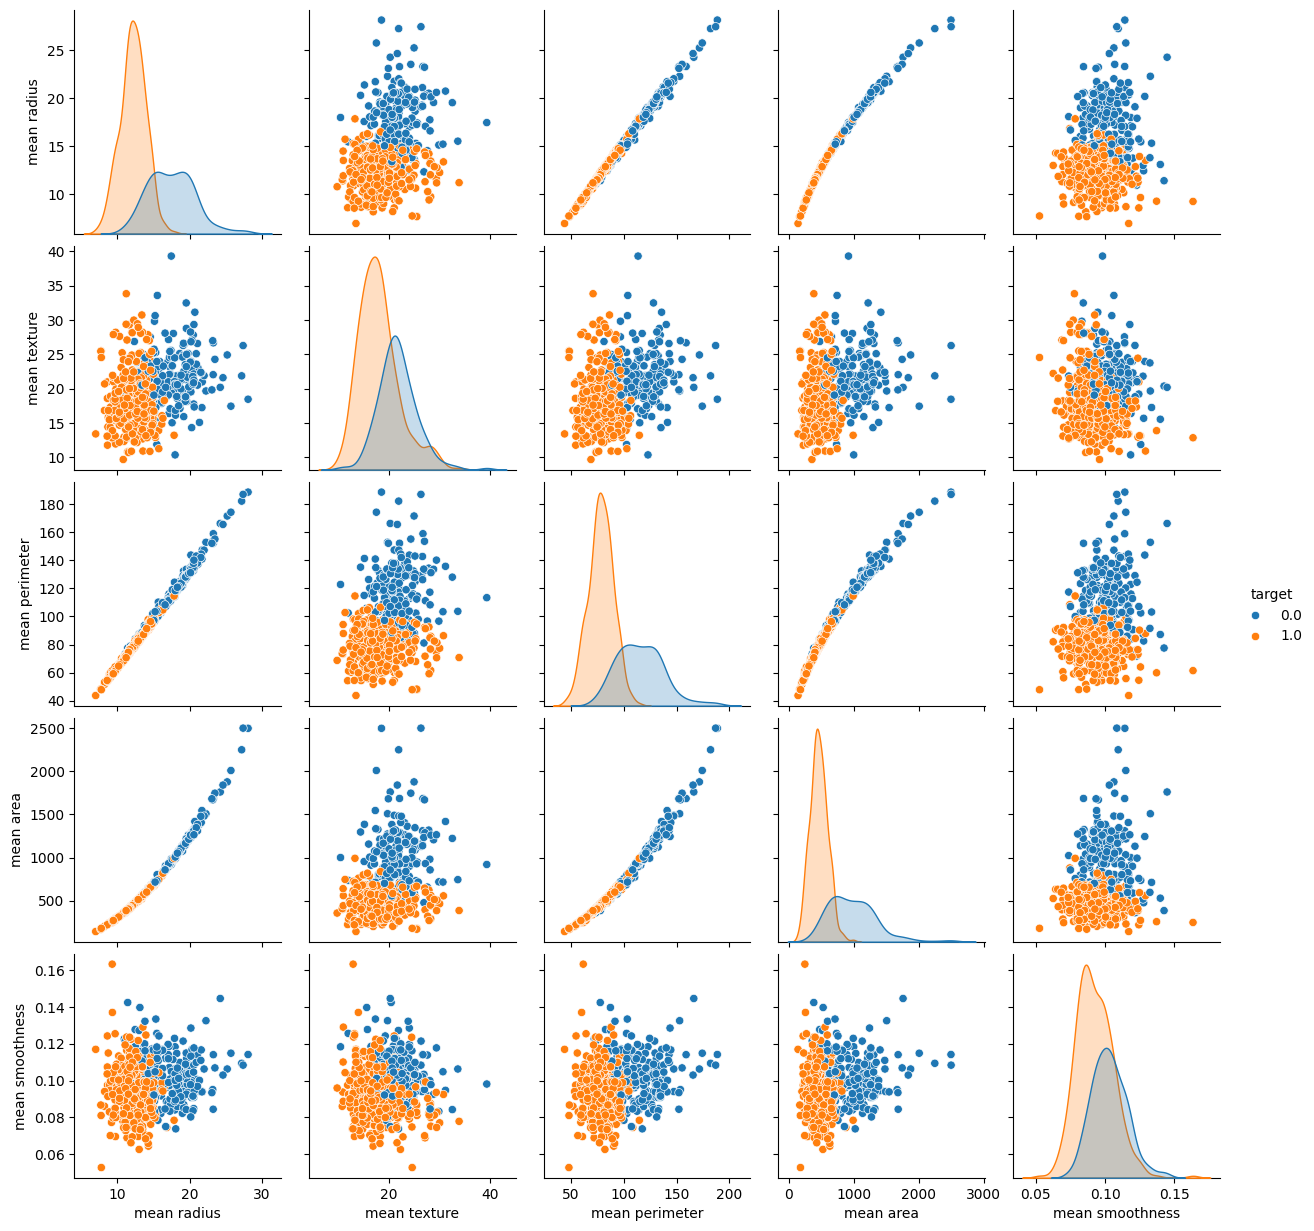

In [11]:
sns.pairplot(df_cancer, hue='target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

<Axes: ylabel='count'>

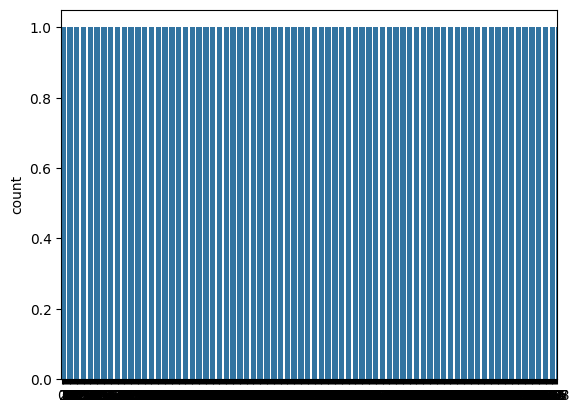

In [14]:
sns.countplot(df_cancer['target'])

<Axes: xlabel='mean area', ylabel='mean smoothness'>

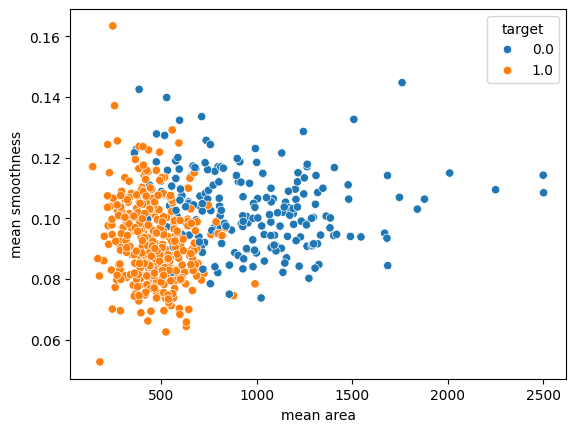

In [15]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue='target', data = df_cancer)

<Axes: >

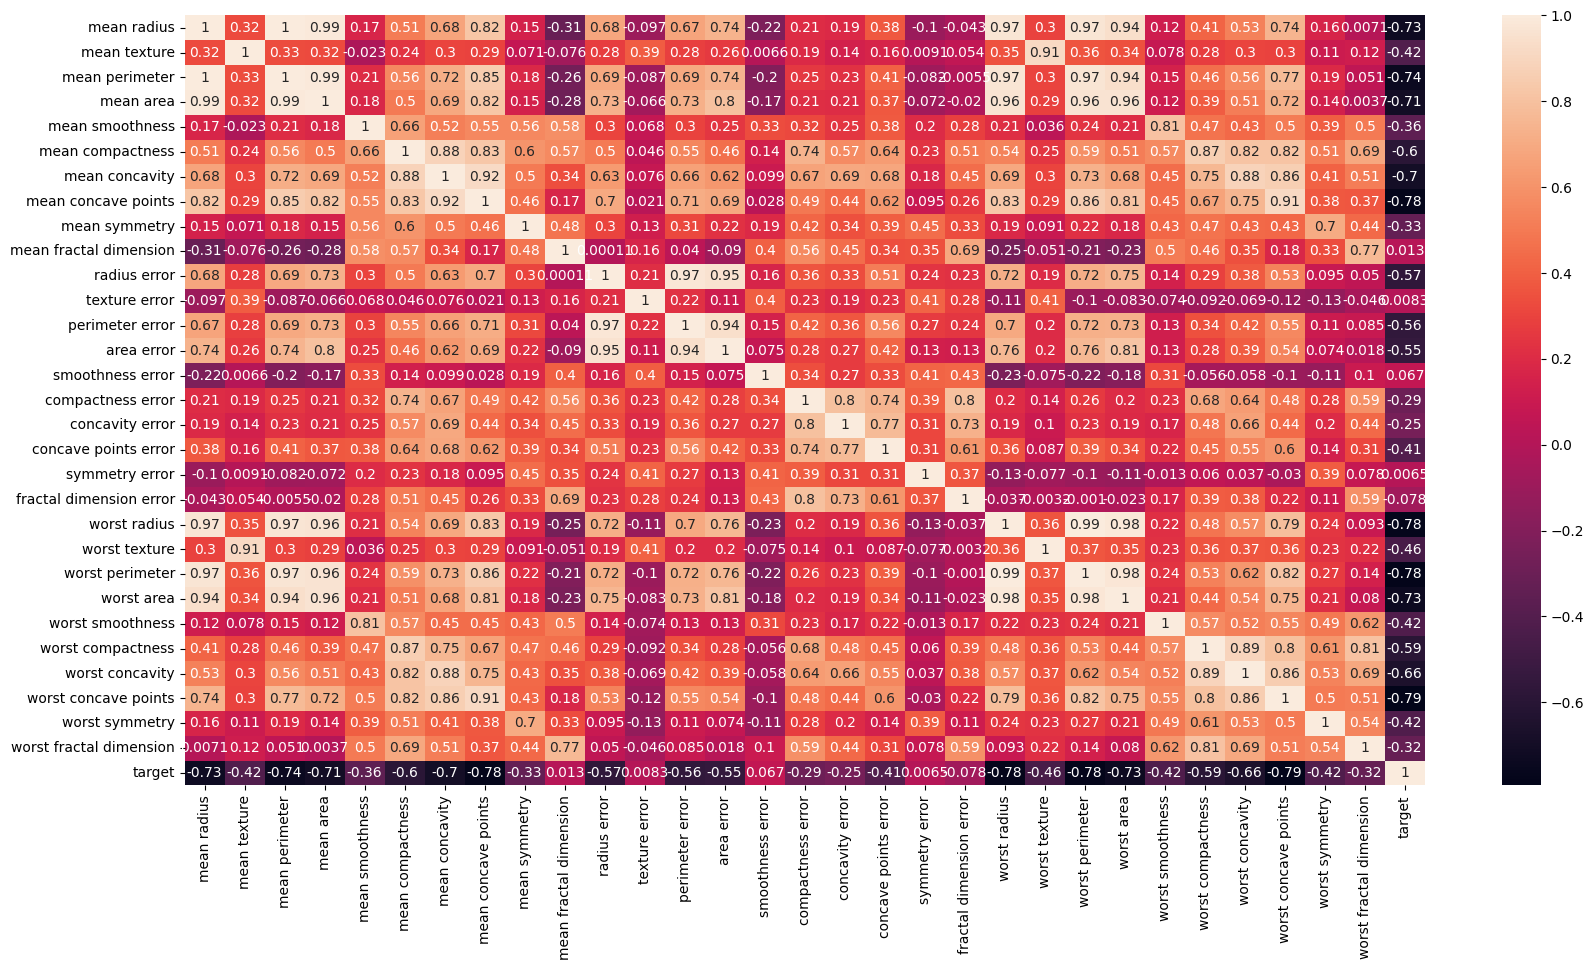

In [16]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_cancer.corr(), annot = True)

Step 3: Training the Model


In [30]:
X = df_cancer.drop(['target'], axis = 1)

In [31]:
y = df_cancer['target']

In [28]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 40)

In [26]:
from sklearn.svm import SVC

In [25]:
model = SVC()

In [38]:
model.fit(X_train, y_train)

SVC()

Step 4: Evaluating the Model

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0.

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 84,  15],
       [  4, 182]])

<Axes: >

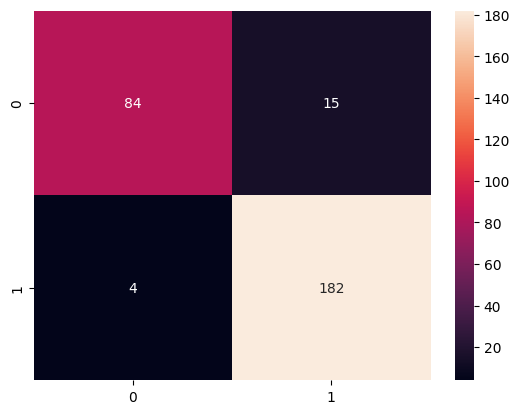

In [48]:
sns.heatmap(cm, annot = True, fmt='g')

In [49]:
accuracy_score(y_test, y_pred) * 100

93.33333333333333

Step 5: Improving the Model


In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
scaler.partial_fit(X_train)

MinMaxScaler()

In [53]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = cancer['feature_names'])
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.216694,0.193103,0.207812,0.109650,0.412295,0.190694,0.144822,0.117346,0.000000,0.266652,...,0.157951,0.158262,0.142985,0.069308,0.258483,0.141009,0.131629,0.216357,0.063484,0.214716
1,0.231371,0.297471,0.215848,0.117413,0.489953,0.128918,0.089246,0.160984,0.186332,0.240009,...,0.180719,0.270352,0.169381,0.082653,0.427734,0.077562,0.121486,0.377663,0.259871,0.177870
2,0.240178,0.480460,0.227797,0.123139,0.489845,0.189620,0.059864,0.108300,0.454885,0.282594,...,0.182142,0.447145,0.172718,0.082997,0.514034,0.205236,0.092971,0.283952,0.389677,0.206230
3,0.269534,0.281839,0.247362,0.143415,0.352775,0.058156,0.010480,0.031923,0.025627,0.147849,...,0.192458,0.219320,0.169680,0.088232,0.244240,0.016930,0.015479,0.095670,0.090839,0.074810
4,0.198591,0.193563,0.187828,0.097222,0.295862,0.157690,0.083083,0.103082,0.446343,0.272985,...,0.147990,0.253341,0.146023,0.064368,0.236699,0.182417,0.124042,0.232096,0.422452,0.199084


<Axes: xlabel='mean area', ylabel='mean smoothness'>

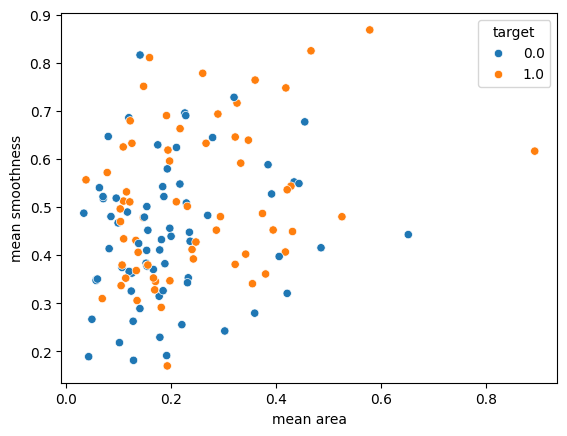

In [54]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = y_train, data = X_train_scaled)

In [55]:
scaler.partial_fit(X_test)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = cancer['feature_names'])
X_test_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.321312,0.120392,0.305922,0.186299,0.355241,0.131372,0.024906,0.095278,0.268687,0.192923,...,0.239772,0.130864,0.217939,0.116963,0.302648,0.077529,0.029808,0.199381,0.247979,0.084612
1,0.364381,0.352384,0.352083,0.229480,0.415636,0.161401,0.173266,0.261382,0.265657,0.195029,...,0.396300,0.502665,0.363514,0.234172,0.496797,0.155048,0.232748,0.552921,0.288587,0.177883
2,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,0.443555,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
3,0.357281,0.144403,0.346002,0.212386,0.517017,0.224035,0.161551,0.322813,0.297980,0.236942,...,0.279972,0.130864,0.262413,0.138788,0.419534,0.116919,0.109665,0.367354,0.205204,0.151253
4,0.357755,0.602976,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,0.627778,0.438290,...,0.339025,0.669243,0.367000,0.186296,0.638117,0.611627,0.561182,0.588316,0.522965,0.518562


Training the model again, with normalized data


In [56]:
model.fit(X_train_scaled, y_train)

SVC()

In [57]:
y_pred_scaled = model.predict(X_test_scaled)

In [58]:
cm = confusion_matrix(y_test, y_pred_scaled)
cm

array([[ 97,   2],
       [  0, 186]])

<Axes: >

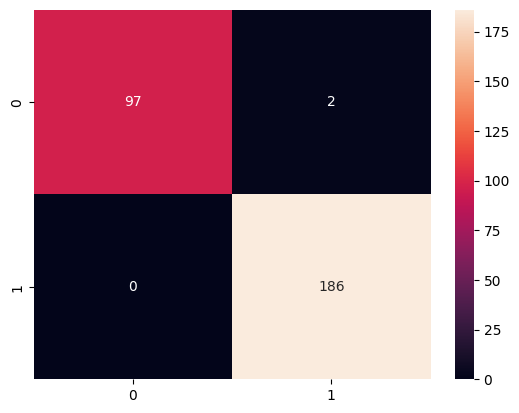

In [59]:
sns.heatmap(cm, annot = True, fmt='g')

In [60]:
accuracy_score(y_test, y_pred_scaled) * 100

99.29824561403508

In [61]:
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        99
         1.0       0.99      1.00      0.99       186

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285




Tweaking the parameters of SVM to achieve higher accuracy

In [62]:
from sklearn.model_selection import ParameterGrid, GridSearchCV

In [63]:
c_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 0.01, 0.001, 0.0001]
kernels = ['rbf']
param_grid = {'C': c_values, 'gamma': gamma_values, 'kernel': kernels}

In [65]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)

In [66]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.614 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.596 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.596 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.596 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.607 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.614 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [67]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [68]:
grid_pred = grid.predict(X_test_scaled)

In [69]:
cm = confusion_matrix(y_test, grid_pred)
cm

array([[ 86,  13],
       [  0, 186]])

<Axes: >

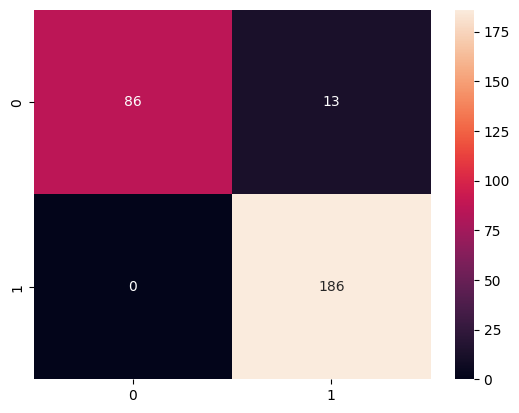

In [70]:
sns.heatmap(cm, annot = True, fmt='g')

In [71]:
accuracy_score(y_test, grid_pred) * 100

95.43859649122807

In [72]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        99
         1.0       0.93      1.00      0.97       186

    accuracy                           0.95       285
   macro avg       0.97      0.93      0.95       285
weighted avg       0.96      0.95      0.95       285

